# Logistic 回归——Otto商品分类

我们以Kaggle 2015年举办的Otto Group Product Classification Challenge竞赛数据为例，分别调用缺省参数LogisticRegression、LogisticRegression + GridSearchCV以及LogisticRegressionCV进行参数调优。实际应用中LogisticRegression + GridSearchCV或LogisticRegressionCV任选一个即可。

Otto数据集是著名电商Otto提供的一个多类商品分类问题，类别数=9. 每个样本有93维数值型特征（整数，表示某种事件发生的次数，已经进行过脱敏处理）。 竞赛官网：https://www.kaggle.com/c/otto-group-product-classification-challenge/data


第一名：https://www.kaggle.com/c/otto-group-product-classification-challenge/discussion/14335
第二名：http://blog.kaggle.com/2015/06/09/otto-product-classification-winners-interview-2nd-place-alexander-guschin/

In [1]:
# 首先 import 必要的模块
import pandas as pd 
import numpy as np

from sklearn.model_selection import GridSearchCV

#竞赛的评价指标为logloss
from sklearn.metrics import log_loss  

import matplotlib.pyplot as plt
import seaborn as sns

from zhou.utils_zhou import *
%matplotlib inline

## 读取数据 & 数据探索

In [2]:
# 读取数据
# path to where the data lies
dpath = './data/'
train = pd.read_csv(dpath +"Otto_train.csv")
train.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [3]:
show_number_describe(train)

共有：[61878]条样本，特征数为：[95]，其中有[94]个特征是number
使用内存大小为: [44.38] KB


,count,mean,std,min,25%,50%,75%,max,dif_vals,dtype,num_null
id,61878,30939.500000,17862.784315,1.0,15470.25,30939.5,46408.75,61878.0,61878,int64,0
feat_1,61878,0.386680,1.525330,0.0,0.00,0.0,0.00,61.0,42,int64,0
feat_2,61878,0.263066,1.252073,0.0,0.00,0.0,0.00,51.0,37,int64,0
feat_3,61878,0.901467,2.934818,0.0,0.00,0.0,0.00,64.0,48,int64,0
feat_4,61878,0.779081,2.788005,0.0,0.00,0.0,0.00,70.0,59,int64,0
feat_5,61878,0.071043,0.438902,0.0,0.00,0.0,0.00,19.0,15,int64,0
feat_6,61878,0.025696,0.215333,0.0,0.00,0.0,0.00,10.0,9,int64,0
feat_7,61878,0.193704,1.030102,0.0,0.00,0.0,0.00,38.0,30,int64,0
feat_8,61878,0.662433,2.255770,0.0,0.00,0.0,1.00,76.0,55,int64,0
feat_9,61878,1.011296,3.474822,0.0,0.00,0.0,0.00,43.0,40,int64,0


In [4]:
## 各属性的统计特性
show_object_describe(train)

共有：[61878]条样本，特征数为：[95]，其中有[1]个特征是object
使用内存大小为: [483.5] KB


,count,unique,top,freq,dif_vals,dtype,num_null
target,61878,9,Class_2,16122,9,object,0


Text(0,0.5,'Number of occurrences')

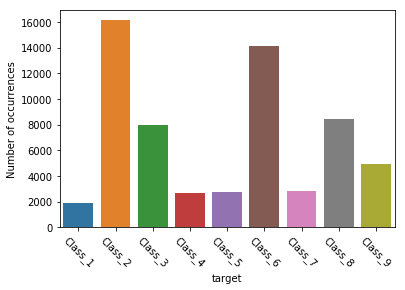

In [5]:
# Target 分布，看看各类样本分布是否均衡
sns.countplot(train.target)
plt.xlabel('target')
plt.xticks(rotation=-45)
plt.ylabel('Number of occurrences')

各类样本不均衡。交叉验证对分类任务缺省的是采用StratifiedKFold，在每折采样时根据各类样本按比例采样

## 特征编码

In [6]:
# 将类别字符串变成数字
# drop ids and get labels
y_train = train['target']   #形式为Class_x
y_train = y_train.map(lambda s: int(s[-1])-1)

X_train = train.drop(["id", "target"], axis=1).values

## 数据预处理

In [7]:
# 数据标准化
from sklearn.preprocessing import StandardScaler

# 初始化特征的标准化器
ss_X = StandardScaler()

# 分别对训练和测试数据的特征进行标准化处理
X_train = ss_X.fit_transform(X_train)
#X_test = ss_X.transform(X_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## 模型训练

### default Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()

In [9]:
# 交叉验证用于评估模型性能和进行参数调优（模型选择）
#分类任务中交叉验证缺省是采用StratifiedKFold
from sklearn.model_selection import cross_val_score
loss = cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_log_loss')
print('logloss of each fold is: ',-loss)
print('cv logloss is:', -loss.mean())

logloss of each fold is:  [0.67686756 0.68182122 0.66838152 0.66628673 0.67439539]
cv logloss is: 0.6735504851732015


### 正则化的 Logistic Regression及参数调优

logistic回归的需要调整超参数有：C（正则系数，一般在log域（取log后的值）均匀设置候选参数）和正则函数penalty（L2/L1） 
目标函数为：J = sum(logloss(f(xi), yi)) + C* penalty 

在sklearn框架下，不同学习器的参数调整步骤相同：
设置候选参数集合
调用GridSearchCV
调用fit

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

#需要调优的参数
# 请尝试将L1正则和L2正则分开，并配合合适的优化求解算法（slover）
#tuned_parameters = {'penalty':['l1','l2'],
#                   'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
#                   }
penaltys = ['l1','l2']
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
tuned_parameters = dict(penalty = penaltys, C = Cs)

lr_penalty= LogisticRegression()
grid= GridSearchCV(lr_penalty, tuned_parameters,cv=5, scoring='neg_log_loss', return_train_score=True)
grid.fit(X_train,y_train,)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_log_loss', verbose=0)

In [11]:
# view the complete results (list of named tuples)
grid.cv_results_

{'mean_fit_time': array([ 2.72490897,  6.97835269,  6.5646143 , 12.13262329, 19.77635088,
        19.98052459, 34.68083482, 25.53122716, 45.80914564, 28.5456768 ,
        47.48533306, 29.21527534, 47.7547605 , 29.80271773]),
 'std_fit_time': array([0.06491378, 0.01306508, 0.13511194, 0.11523414, 0.38997935,
        0.27969637, 0.90147033, 0.4283035 , 0.99571372, 0.30530135,
        1.21265028, 0.50089261, 1.49851797, 0.35984359]),
 'mean_score_time': array([0.01437755, 0.01246705, 0.01350088, 0.01083407, 0.0114233 ,
        0.01207523, 0.01370387, 0.01126256, 0.01046486, 0.01048827,
        0.0116806 , 0.00766344, 0.01025348, 0.00944672]),
 'std_score_time': array([0.00326477, 0.00391248, 0.00267235, 0.0019115 , 0.00171671,
        0.00311987, 0.00371249, 0.0024336 , 0.00081722, 0.00082786,
        0.0032356 , 0.00294003, 0.000372  , 0.00079583]),
 'param_C': masked_array(data=[0.001, 0.001, 0.01, 0.01, 0.1, 0.1, 1, 1, 10, 10, 100,
                    100, 1000, 1000],
              ma

In [12]:
# examine the best model
print(-grid.best_score_)
print(grid.best_params_)

0.6718330643257117
{'C': 100, 'penalty': 'l2'}


如果最佳值在候选参数的边缘，最好再尝试更大的候选参数或更小的候选参数，直到找到拐点。
l2, c=100

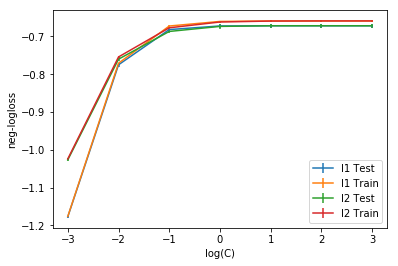

In [13]:
#pd.DataFrame(grid.cv_results_).to_csv('LogisticGridSearchCV_Otto.csv')
#cvresult = pd.DataFrame.from_csv('LogisticGridSearchCV_Otto.csv')
#test_means = cv_results['mean_test_score']
#test_stds = cv_results['std_test_score'] 
#train_means = cvresult['mean_train_score']
#train_stds = cvresult['std_train_score'] 


# plot CV误差曲线
test_means = grid.cv_results_[ 'mean_test_score' ]
test_stds = grid.cv_results_[ 'std_test_score' ]
train_means = grid.cv_results_[ 'mean_train_score' ]
train_stds = grid.cv_results_[ 'std_train_score' ]


# plot results
n_Cs = len(Cs)
number_penaltys = len(penaltys)
test_scores = np.array(test_means).reshape(n_Cs,number_penaltys)
train_scores = np.array(train_means).reshape(n_Cs,number_penaltys)
test_stds = np.array(test_stds).reshape(n_Cs,number_penaltys)
train_stds = np.array(train_stds).reshape(n_Cs,number_penaltys)

x_axis = np.log10(Cs)
for i, value in enumerate(penaltys):
    #plt.plot(log(Cs), test_scores[i], label= 'penalty:'   + str(value))
    plt.errorbar(x_axis, test_scores[:,i], yerr=test_stds[:,i] ,label = penaltys[i] +' Test')
    plt.errorbar(x_axis, train_scores[:,i], yerr=train_stds[:,i] ,label = penaltys[i] +' Train')
    
plt.legend()
plt.xlabel( 'log(C)' )                                                                                                      
plt.ylabel( 'neg-logloss' )
#plt.savefig('LogisticGridSearchCV_C.png' )

plt.show()

上图给出了L1正则和L2正则下、不同正则参数C对应的模型在训练集上测试集上的正确率（score）。可以看出在训练集上C越大（正则越少）的模型性能越好；但在测试集上当C=100时性能最好（L1正则和L2正则均是）

### 用LogisticRegressionCV实现正则化的 Logistic Regression

### L1正则

In [14]:
from sklearn.linear_model import LogisticRegressionCV

Cs = [1, 10,100,1000]

# 大量样本（6W+）、高维度（93），L1正则 --> 可选用saga优化求解器(0.19版本新功能)
# LogisticRegressionCV比GridSearchCV快
lrcv_L1 = LogisticRegressionCV(Cs=Cs, cv = 5, scoring='neg_log_loss', penalty='l1', solver='liblinear', multi_class='ovr')
lrcv_L1.fit(X_train, y_train)    

LogisticRegressionCV(Cs=[1, 10, 100, 1000], class_weight=None, cv=5,
           dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=100, multi_class='ovr', n_jobs=1, penalty='l1',
           random_state=None, refit=True, scoring='neg_log_loss',
           solver='liblinear', tol=0.0001, verbose=0)

In [15]:
lrcv_L1.scores_

{0: array([[-0.08352356, -0.08351865, -0.08351928, -0.08351946],
        [-0.08855248, -0.08870815, -0.08872627, -0.08872808],
        [-0.08310827, -0.08322738, -0.08324094, -0.08324249],
        [-0.08218092, -0.08218953, -0.08219015, -0.08219021],
        [-0.08079022, -0.08076726, -0.08076556, -0.08076537]]),
 1: array([[-0.3168285 , -0.3168227 , -0.31682295, -0.31682226],
        [-0.32032906, -0.32039054, -0.32039816, -0.32039951],
        [-0.31523859, -0.31526663, -0.31526964, -0.31526953],
        [-0.31668878, -0.3166923 , -0.31669173, -0.3166933 ],
        [-0.31923563, -0.31928619, -0.31929201, -0.31929166]]),
 2: array([[-0.26140583, -0.26141873, -0.26142133, -0.2614215 ],
        [-0.26185397, -0.26188102, -0.26188316, -0.26188462],
        [-0.26767749, -0.26772418, -0.26772986, -0.26772974],
        [-0.26380722, -0.26382837, -0.2638314 , -0.26383136],
        [-0.26326447, -0.26328782, -0.26329081, -0.26329109]]),
 3: array([[-0.13062851, -0.13080914, -0.13082958, -0.1

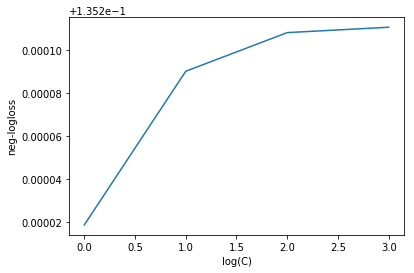

In [17]:
# scores_：dict with classes as the keys, and the values as the grid of scores obtained during cross-validating each fold,
# Each dict value has shape (n_folds, len(Cs))
n_Cs = len(Cs)
n_classes = 9
scores =  np.zeros((n_classes,n_Cs))

for j in range(n_classes):
        scores[j][:] = np.mean(lrcv_L1.scores_[j],axis = 0)
    
mse_mean = -np.mean(scores, axis = 0)
plt.plot(np.log10(Cs), mse_mean.reshape(n_Cs,1)) 
#plt.plot(np.log10(reg.Cs)*np.ones(3), [0.28, 0.29, 0.30])
plt.xlabel('log(C)')
plt.ylabel('neg-logloss')
plt.show()

#print ('C is:',lr_cv.C_)  #对多类分类问题，每个类别的分类器有一个C


这个score似乎和GridSearchCV得到的Score不一样

In [18]:
lrcv_L1.coef_

array([[-4.48002118e-02, -1.82111411e-01, -3.33911190e-01,
        -1.32163398e-01,  6.85664076e-02,  5.58926005e-02,
         8.72989150e-02,  6.00921390e-02, -1.02845292e+00,
         2.67946181e-02, -1.40902711e+00,  1.41474114e-02,
        -2.80659640e-01, -1.10578842e+00, -1.67704741e+00,
        -7.18211423e-02,  3.14197523e-01,  1.31889316e-01,
        -6.49675103e-01,  1.16807603e-01, -5.46827293e-03,
         5.97489264e-02,  1.18194245e-01,  3.36818957e-01,
        -7.92679965e-01, -1.30459536e-01, -1.27749302e-01,
         7.43410273e-02, -2.85531008e-01,  2.22172666e-01,
        -4.11325251e-01,  8.97246408e-02, -2.90529316e-01,
        -1.04224473e+00, -5.83881984e-01, -1.71003598e-01,
         2.03481743e-01, -1.02884626e-01, -1.44835437e-01,
        -1.26935763e+00, -2.59957681e-01, -4.48981053e-01,
        -1.75085731e+00,  1.44899471e-01, -3.11415132e-01,
        -2.38934578e-01, -2.03722100e-01,  3.65406895e-02,
         4.31025519e-02, -5.61942990e-01,  2.54902318e-0

惩罚不够，没有稀疏系数

### L2正则

In [19]:
from sklearn.linear_model import LogisticRegressionCV

Cs = [1, 10,100,1000]

# 大量样本（6W+）、高维度（93），L2正则 --> 缺省用lbfgs，为了和GridSeachCV比较，也用liblinear

lr_cv_L2 = LogisticRegressionCV(Cs=Cs, cv = 5, scoring='neg_log_loss', penalty='l2', solver='liblinear', multi_class='ovr')
lr_cv_L2.fit(X_train, y_train)    

LogisticRegressionCV(Cs=[1, 10, 100, 1000], class_weight=None, cv=5,
           dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2',
           random_state=None, refit=True, scoring='neg_log_loss',
           solver='liblinear', tol=0.0001, verbose=0)

In [20]:
lr_cv_L2.scores_

{0: array([[-0.08350778, -0.08351507, -0.08351915, -0.08351958],
        [-0.08843241, -0.08868921, -0.08872515, -0.08872916],
        [-0.08309285, -0.08322307, -0.08324122, -0.08324311],
        [-0.08219928, -0.08218897, -0.0821904 , -0.08219058],
        [-0.08077456, -0.08076278, -0.0807651 , -0.08076532]]),
 1: array([[-0.31683131, -0.3168208 , -0.31682048, -0.3168204 ],
        [-0.32034995, -0.3203986 , -0.32040404, -0.32040443],
        [-0.31524518, -0.31526798, -0.3152707 , -0.31527087],
        [-0.31669067, -0.31668999, -0.31669031, -0.3166903 ],
        [-0.31923841, -0.31929392, -0.31929992, -0.31930018]]),
 2: array([[-0.26142888, -0.26142004, -0.26142014, -0.26142013],
        [-0.26187224, -0.26188242, -0.26188465, -0.26188469],
        [-0.26763478, -0.26772385, -0.26773421, -0.26773523],
        [-0.26382999, -0.26383177, -0.26383283, -0.26383297],
        [-0.26330207, -0.26329102, -0.26329081, -0.26329113]]),
 3: array([[-0.1306375 , -0.13080842, -0.13083058, -0.1

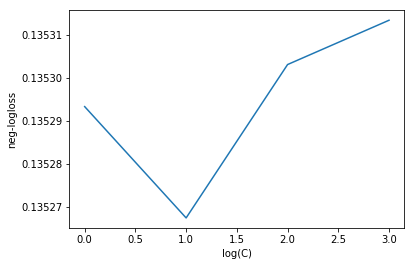

In [21]:
# dict with classes as the keys, and the values as the grid of scores obtained during cross-validating each fold,
# Each dict value has shape (n_folds, len(Cs))
n_Cs = len(Cs)
n_classes = 9
scores =  np.zeros((n_classes,n_Cs))

for j in range(n_classes):
        scores[j][:] = np.mean(lr_cv_L2.scores_[j],axis = 0)
    
mse_mean = -np.mean(scores, axis = 0)
plt.plot(np.log10(Cs), mse_mean.reshape(n_Cs,1)) 
#plt.plot(np.log10(reg.Cs)*np.ones(3), [0.28, 0.29, 0.30])
plt.xlabel('log(C)')
plt.ylabel('neg-logloss')
plt.show()

#print ('C is:',lr_cv.C_)  #对多类分类问题，每个类别的分类器有一个C


In [22]:
from sklearn.linear_model import LogisticRegressionCV

Cs = [1, 10,100,1000]

# 大量样本（6W+）、高维度（93），L2正则 --> 缺省用lbfgs
# LogisticRegressionCV比GridSearchCV快
lrcv_L2 = LogisticRegressionCV(Cs=Cs, cv = 5, scoring='neg_log_loss', penalty='l2', multi_class='ovr')
lrcv_L2.fit(X_train, y_train)    

LogisticRegressionCV(Cs=[1, 10, 100, 1000], class_weight=None, cv=5,
           dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2',
           random_state=None, refit=True, scoring='neg_log_loss',
           solver='lbfgs', tol=0.0001, verbose=0)

In [23]:
lrcv_L2.scores_

{0: array([[-0.08350408, -0.08351795, -0.08351912, -0.08351919],
        [-0.08855341, -0.08870812, -0.08872518, -0.08872523],
        [-0.08314284, -0.0832322 , -0.08324172, -0.08324186],
        [-0.08221991, -0.08219267, -0.08219213, -0.08219205],
        [-0.0807325 , -0.08076051, -0.08076432, -0.0807644 ]]),
 1: array([[-0.31682273, -0.31682131, -0.31682132, -0.31682128],
        [-0.32037239, -0.32040309, -0.32040268, -0.32040262],
        [-0.31524853, -0.31526803, -0.31526825, -0.31526945],
        [-0.31668648, -0.31669101, -0.31669107, -0.31669141],
        [-0.31926347, -0.31929607, -0.31929663, -0.31929615]]),
 2: array([[-0.26141933, -0.26141698, -0.26142102, -0.26142073],
        [-0.26187511, -0.26188419, -0.26188386, -0.26188413],
        [-0.2676773 , -0.26772959, -0.26773578, -0.2677359 ],
        [-0.26382905, -0.26383073, -0.26383163, -0.26383177],
        [-0.2633014 , -0.26329021, -0.26328986, -0.26329025]]),
 3: array([[-0.13075431, -0.13082399, -0.13083258, -0.1

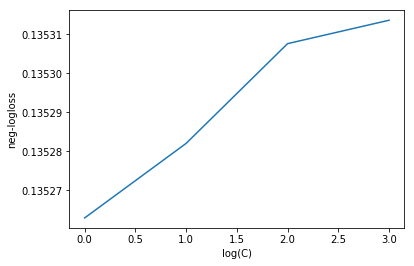

In [24]:
# dict with classes as the keys, and the values as the grid of scores obtained during cross-validating each fold,
# Each dict value has shape (n_folds, len(Cs))
n_Cs = len(Cs)
n_classes = 9
scores =  np.zeros((n_classes,n_Cs))

for j in range(n_classes):
        scores[j][:] = np.mean(lrcv_L2.scores_[j],axis = 0)
    
mse_mean = -np.mean(scores, axis = 0)
plt.plot(np.log10(Cs), mse_mean.reshape(n_Cs,1)) 
#plt.plot(np.log10(reg.Cs)*np.ones(3), [0.28, 0.29, 0.30])
plt.xlabel('log(C)')
plt.ylabel('neg-logloss')
plt.show()

#print ('C is:',lr_cv.C_)  #对多类分类问题，每个类别的分类器有一个C
